<a href="https://colab.research.google.com/github/rczhen/faiss_playground/blob/main/faiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Introduction to Facebook AI Similarity Search (Faiss)
](https://www.pinecone.io/learn/series/faiss/faiss-tutorial/)

In [57]:
import requests
from io import StringIO
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)

In [6]:
res = requests.get('https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/sick2014/SICK_train.txt')
# create dataframe
data = pd.read_csv(StringIO(res.text), sep='\t')
data.head()

pair_ID  \
0        1   
1        2   
2        3   
3        5   
4        9   

                                                                                   sentence_A  \
0           A group of kids is playing in a yard and an old man is standing in the background   
1  A group of children is playing in the house and there is no man standing in the background   
2                           The young boys are playing outdoors and the man is smiling nearby   
3                                       The kids are playing outdoors near a man with a smile   
4                           The young boys are playing outdoors and the man is smiling nearby   

                                                                          sentence_B  \
0       A group of boys in a yard is playing and a man is standing in the background   
1  A group of kids is playing in a yard and an old man is standing in the background   
2                              The kids are playing outdoors near a man with a smile   
3  A group of kids is playing in a yard and an old man is standing in the background   
4  A group of kids is playing in a yard and an old man is standing in the background   

   relatedness_score entailment_judgment  
0                4.5             NEUTRAL  
1                3.2             NEUTRAL  
2                4.7          ENTAILMENT  
3                3.4             NEUTRAL  
4                3.7             NEUTRAL

In [7]:
# we take all samples from both sentence A and B
sentences = data['sentence_A'].tolist()
sentences[:5]

['A group of kids is playing in a yard and an old man is standing in the background',
 'A group of children is playing in the house and there is no man standing in the background',
 'The young boys are playing outdoors and the man is smiling nearby',
 'The kids are playing outdoors near a man with a smile',
 'The young boys are playing outdoors and the man is smiling nearby']

In [8]:
# we take all samples from both sentence A and B
sentences = data['sentence_A'].tolist()
sentence_b = data['sentence_B'].tolist()
sentences.extend(sentence_b)  # merge them
len(set(sentences))  # together we have ~4.5K unique sentences

4802

In [ ]:
# This isn't a particularly large number, so let's pull in a few more similar datasets.
urls = [
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2012/MSRpar.train.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2012/MSRpar.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2012/OnWN.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2013/OnWN.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2014/OnWN.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2014/images.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2015/images.test.tsv'
]

# each of these dataset have the same structure, so we loop through each creating our sentences data
for url in urls:
    res = requests.get(url)
    # extract to dataframe
    data = pd.read_csv(StringIO(res.text), sep='\t', header=None, error_bad_lines=False)
    # add to columns 1 and 2 to sentences list
    sentences.extend(data[1].tolist())
    sentences.extend(data[2].tolist())


In [16]:
len(set(sentences))

14505

In [18]:
# remove duplicates and NaN
sentences = [word for word in list(set(sentences)) if type(word) is str]
len(set(sentences))

14504

In [70]:
sentences[:5]

['characteristic call of an animal',
 'a red and white race car racing on a dirt racetrack.',
 'The yellow dog is running on the dirt road.',
 'an abundance of something',
 'He urged employees to "avoid complacency" and to "change old habits and seriously rethink business-as-usual."']

In [ ]:
!pip install sentence_transformers

In [23]:
from sentence_transformers import SentenceTransformer
# initialize sentence transformer model
model = SentenceTransformer('bert-base-nli-mean-tokens')
# create sentence embeddings
sentence_embeddings = model.encode(sentences)
sentence_embeddings.shape

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(14504, 768)

In [27]:
print(type(sentence_embeddings))
print(model)

<class 'numpy.ndarray'>
SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
)


In [ ]:
!pip install faiss-cpu

In [32]:
import faiss

In [33]:
d = sentence_embeddings.shape[1]
print(d)
index = faiss.IndexFlatL2(d)

768


In [36]:
# Often, we’ll be using indexes that require us to train them before loading in our data.
# We can check whether an index needs to be trained using the is_trained method.
# IndexFlatL2 is not an index that requires training, so we should return False.
index.is_trained

True

In [37]:
index.add(sentence_embeddings)
index.ntotal


14504

In [42]:
# Then search given a query `xq` and number of nearest neigbors to return `k`.
k = 4
xq = model.encode(["Someone sprints with a football"])
print(xq.shape)

(1, 768)


In [61]:
%%time
D, I = index.search(xq, k)  # search
print(D)
print(I)

[[54.623795 54.8535   57.356262 57.90586 ]]
[[10840  2717 14042  1026]]
CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 15.2 ms


In [55]:
print(sentences[10840])
print(sentences[2717])
print(sentences[14042])
print(sentences[1026])

A group of football players is running in the field
A group of people playing football is running in the field
Two groups of people are playing football
A person playing football is running past an official carrying a football


In [58]:
# Now, if we’d rather extract the numerical vectors from Faiss, we can do that too.
# we have 4 vectors to return (k) - so we initialize a zero array to hold them
vecs = np.zeros((k, d))
# then iterate through each ID from I and add the reconstructed vector to our zero-array
for i, val in enumerate(I[0].tolist()):
    vecs[i, :] = index.reconstruct(val)

In [59]:
vecs.shape

(4, 768)

In [60]:
D

array([[54.623795, 54.8535  , 57.356262, 57.90586 ]], dtype=float32)

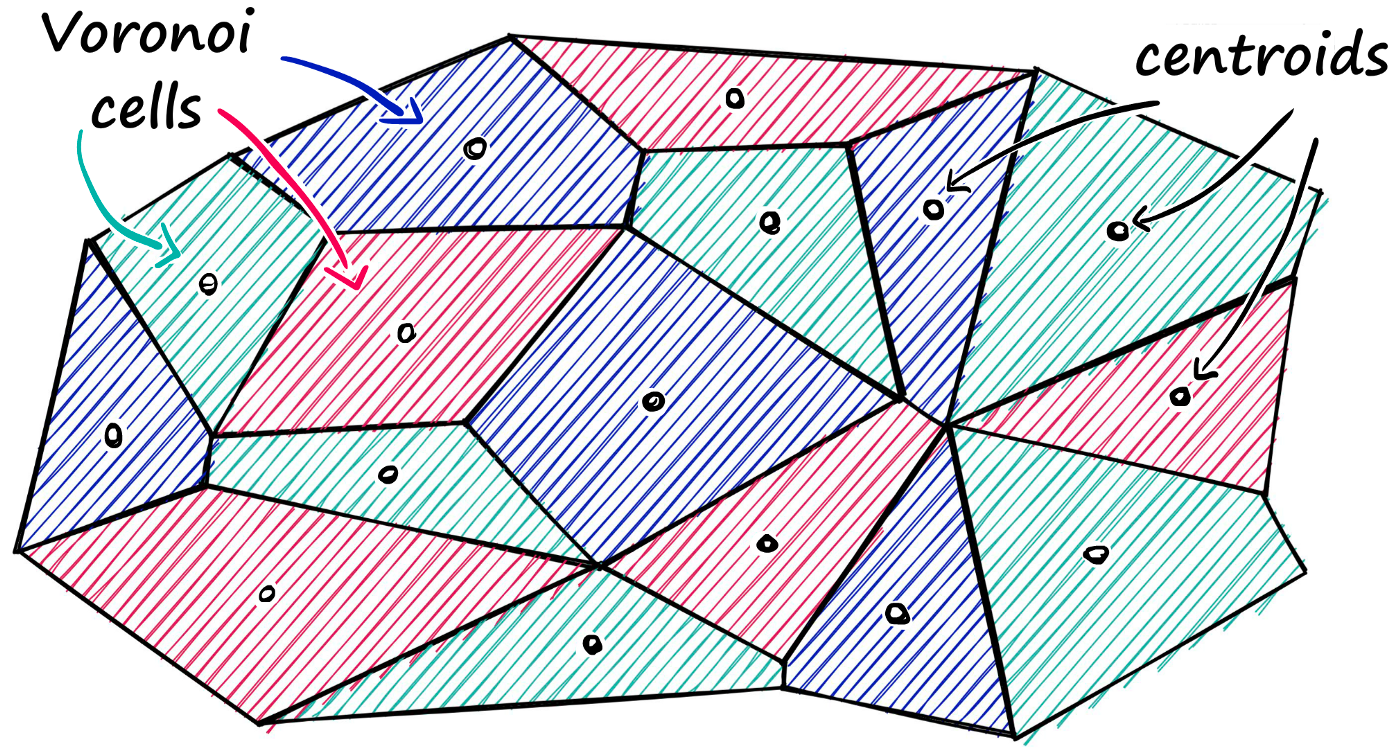

In [62]:
nlist = 50  # how many cells/partitions
quantizer = faiss.IndexFlatL2(d)  # d = 768, dimension
index = faiss.IndexIVFFlat(quantizer, d, nlist)

In [63]:
# Now, when we built the previous IndexFlatL2-only index, we didn’t need to train the index
# as no grouping/transformations were required to build the index.
# Because we added clustering with IndexIVFFlat, this is no longer the case.

# So, what we do now is train our index on our data — which we must do before adding any data to the index.

In [64]:
index.is_trained

False

In [65]:
index.train(sentence_embeddings) # (14504, 768) embeddings
index.is_trained  # check if index is now trained

True

In [66]:
sentence_embeddings.shape

(14504, 768)

In [67]:
# Now that our index is trained, we add our data just as we did before.
index.add(sentence_embeddings)
index.ntotal  # number of embeddings indexed

14504

In [68]:
%%time
D, I = index.search(xq, k)  # search
print(I)

[[10840  2717 14042  1026]]
CPU times: user 660 µs, sys: 0 ns, total: 660 µs
Wall time: 670 µs


In [69]:
# CPU times: user 12 ms, sys: 0 ns, total: 12 ms
# vs
# CPU times: user 660 µs, sys: 0 ns, total: 660 µs

The search time has clearly decreased, in this case, we don’t find any difference between results returned by our exhaustive search, and this approximate search. But, often this can be the case.

If approximate search with **`IndexIVFFlat`** returns suboptimal results, we can improve accuracy by increasing the search scope. We do this by increasing the **`nprobe`** attribute value — which defines **how many nearby cells to search**.

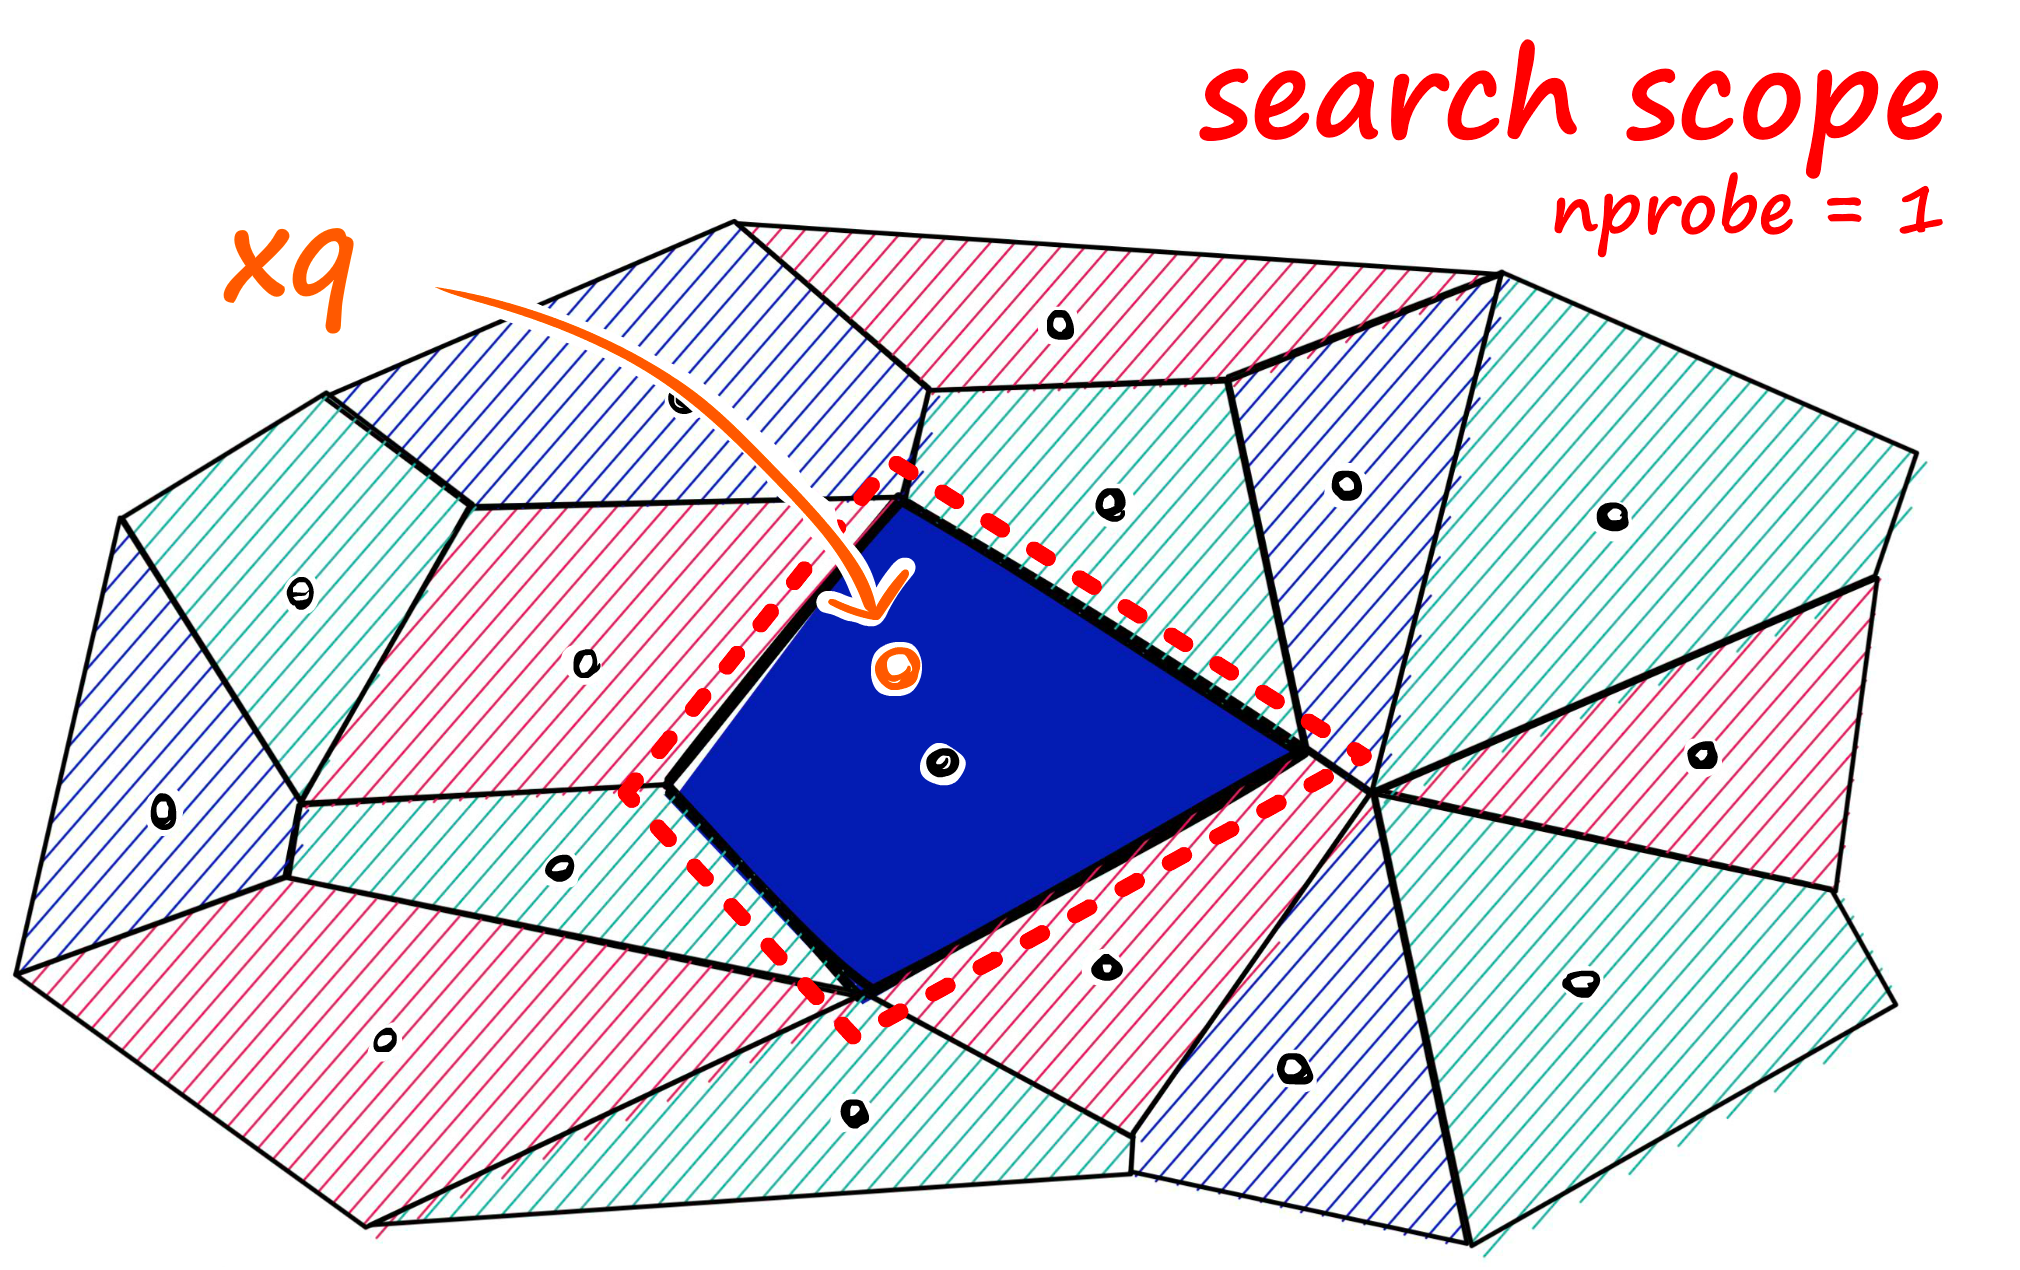

In [72]:
# increase the number of nearby cells to search too with `nprobe`.
index.nprobe = 10

In [73]:
%%time
D, I = index.search(xq, k)  # search
print(I)

[[10840  2717 14042  1026]]
CPU times: user 2.45 ms, sys: 4 µs, total: 2.45 ms
Wall time: 2.47 ms


In [75]:
index.reconstruct(10840)

RuntimeError: Error in faiss::idx_t faiss::DirectMap::get(faiss::idx_t) const at /project/faiss/faiss/invlists/DirectMap.cpp:82: direct map not initialized

If we go ahead and attempt to use `index.reconstruct(<vector_idx>)` again, we will return a RuntimeError as there is no direct mapping between the original vectors and their index position, due to the addition of the IVF step.

So, if we’d like to reconstruct the vectors, we must first create these direct mappings using `index.make_direct_map()`.

In [77]:
index.make_direct_map()
index.reconstruct(10840).shape

(768,)

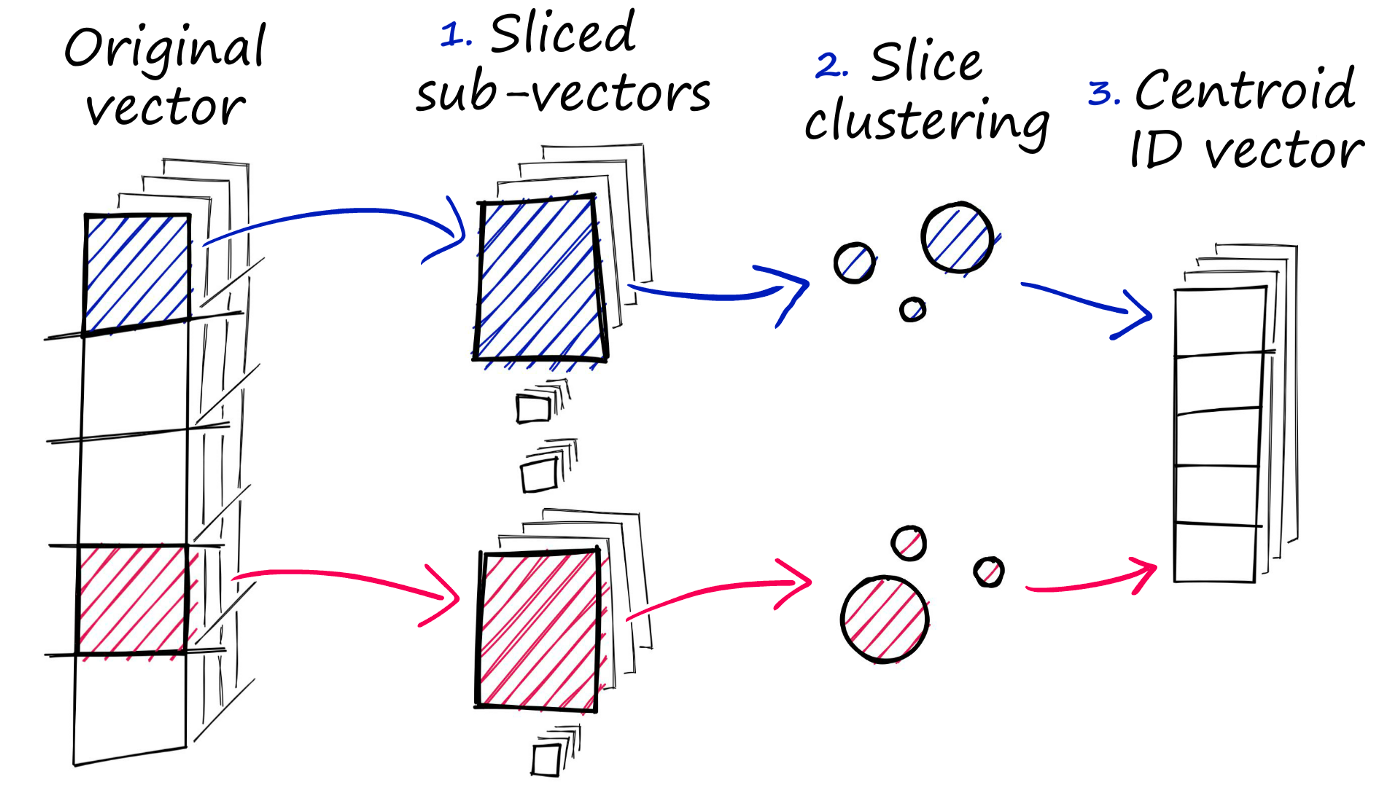

Product Quantization (PQ).
Where IVF allowed us to approximate by reducing the scope of our search, PQ approximates the distance/similarity calculation instead.


In [78]:
m = 8  # number of centroid IDs in final compressed vectors
bits = 8 # number of bits in each centroid

quantizer = faiss.IndexFlatL2(d)  # we keep the same L2 distance flat index
index = faiss.IndexIVFPQ(quantizer, d, nlist, m, bits)

In [79]:
index.is_trained

False

In [80]:
index.train(sentence_embeddings)

In [81]:
index.add(sentence_embeddings)

In [82]:
# searching using our new index
index.nprobe = 10  # align to previous IndexIVFFlat nprobe value

In [83]:
%%time
D, I = index.search(xq, k)
print(I)

[[  45 1026 2124 2717]]
CPU times: user 2.59 ms, sys: 0 ns, total: 2.59 ms
Wall time: 2.63 ms


In [84]:
[f'{i}: {sentences[i]}' for i in I[0]]

['45: Young boys play touch football.',
 '1026: A person playing football is running past an official carrying a football',
 '2124: A football player is carrying an official past a rolling football',
 '2717: A group of people playing football is running in the field']

Both of our speed optimization operations, IVF and PQ, come at the cost of accuracy.